In [1]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
import pandas as pd
from datetime import datetime
def euclid(df):
    return np.sqrt((df['centroid_x'] - df['centroid_x'].shift(1))**2 + 
                   (df['centroid_y'] - df['centroid_y'].shift(1))**2
)




In [8]:
sub = 'ROI_5-WT_79'
pth = Path(r'D:\thermography\cdkl5_thermal_behaviour_group1\unico')
content = os.listdir(pth)
content = list(filter(lambda c: c.endswith(sub), content) )

conc = list()
for i,s in enumerate(content):
    fnames = pth / s
    temp = dd.read_csv((fnames/'data.csv').as_posix(), sep=';', skiprows=1, 
                     assume_missing=True)  
    temp['temp_norm'] =  temp['temp_max'] - temp['temp_max'].mean() 
    temp['RT_norm'] = temp['RT'] - temp['RT'].mean()
    temp['distance'] = temp.map_partitions(euclid) # da cambiare
    temp['Day_relative'] = i
    temp = temp.reset_index().rename(columns={'index':'index_old'})
    
    conc.append(temp)
    
conc = dd.concat(conc)
conc['Day_relative'] = conc['Date'].apply(lambda x: int(x.split(' ')[0].split('-')[-1]), meta=('int') )
avg_min = conc.groupby(['minute']).mean().compute()#.reset_index()
avg_min = pd.concat([avg_min.loc[407:],avg_min.loc[:407]]).reset_index()

In [9]:
avg_min.head()

,minute,index_old,ID,timeStamp,hour,RT,isDay,temp_avg,temp_med,temp_max,centroid_x,centroid_y,temp_norm,RT_norm,distance,Day_relative
0,407.0,607830.580942,1.141310e+06,762381.282974,6.0,23.372763,0.000000,27.203480,27.203480,29.195094,77.161731,81.574178,0.207950,-0.157748,0.803609,28.016996
1,408.0,608402.340846,1.141948e+06,761910.405122,6.0,23.385435,0.774068,27.046066,27.046066,29.079503,75.740382,94.975102,0.092284,-0.144610,0.581375,28.010851
2,409.0,608891.922586,1.141989e+06,762135.543729,6.0,23.397837,1.000000,26.965382,26.965382,29.022521,64.514398,84.991781,0.035517,-0.132223,0.352368,28.012764
3,410.0,609408.204274,1.143069e+06,762243.795686,6.0,23.418914,1.000000,27.141822,27.141822,29.163422,74.625068,88.755310,0.176576,-0.110981,0.501724,28.013322
4,411.0,609947.503052,1.144287e+06,762111.697452,6.0,23.420603,1.000000,27.033851,27.033851,29.128077,76.403937,82.619540,0.141489,-0.108783,0.430342,28.011099


<IPython.core.display.Javascript object>


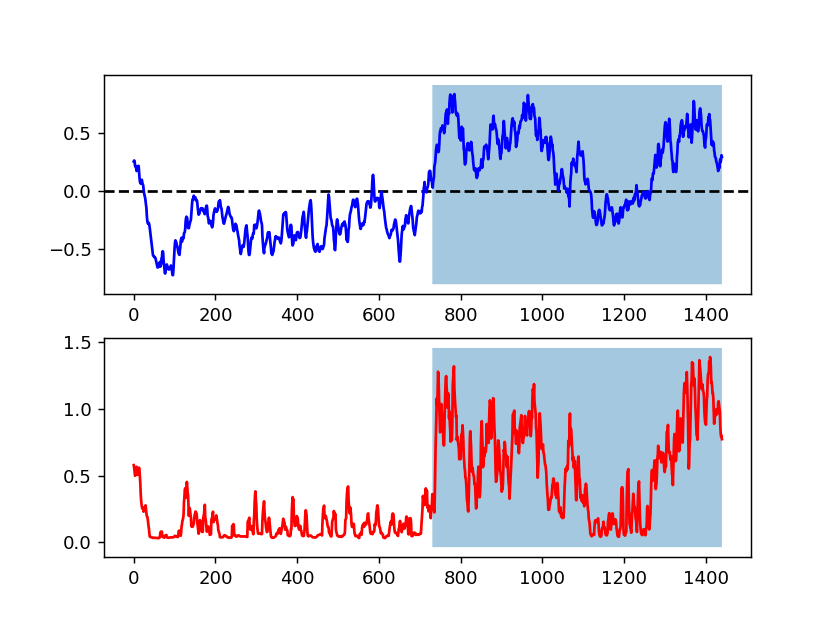

In [11]:
%matplotlib notebook
#RT = (avg_min['RT'] - avg_min['RT'].mean())/avg_min['RT'].std()
#avg = (avg_min['temp_avg'] - avg_min['temp_avg'].mean())/avg_min['temp_avg'].std()

fig,ax = plt.subplots(2,1)
ax[0].axhline(0,color='k',linestyle='--')
temperature = avg_min['temp_norm'] - avg_min['RT_norm']
temperature = temperature.rolling(5, min_periods=0, center=True).mean()
ax[0].plot(temperature,'b')
ylims = ax[0].get_ylim()
ax[0].fill_between(avg_min.index,y1=ylims[0],y2=ylims[1], where=avg_min['isDay']<0.5,alpha=.4)

dist = avg_min['distance'].rolling(5, min_periods=0, center=True).mean()
ax[1].plot(dist ,'r')
ylims = ax[1].get_ylim()
ax[1].fill_between(avg_min.index,y1=ylims[0],y2=ylims[1], where=avg_min['isDay']<0.5,alpha=.4)
#plt.plot(avg,'r')


In [31]:
avg_min

In [32]:

def parsedate(date):
    try:
        return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').day
    except:
        return np.nan

#for i,row in df.iterrows():
#     print( int( row['Date'].split(' ')[0].split('-')[-1]) ) 
df['Day'] = df['Date'].apply(lambda x: int(x.split(' ')[0].split('-')[-1]), meta=('int') )
df['Day_rel'] = df['Day'] - df['Day'].unique().compute().min()
#df['Day_rel'] = df['Day']-df['Day'].loc[0]
df.head()

In [22]:
df['Day_rel'].unique().compute()

0    0
1    1
2    2
3    3
Name: Day_rel, dtype: int64

In [17]:

#df['mot_dist'] = np.sqrt((df['centroid_x'] - df['centroid_x'].shift(1))**2 + (df['centroid_y'] - df['centroid_y'].shift(1))**2)
#df['mot_dist'] = df['mot_dist'].fillna(0)



avg_min
#avg_min

,ID,timeStamp,hour,RT,isDay,temp_avg,temp_med,temp_max,centroid_x,centroid_y,distance
0,1.336434e+06,155847.136659,6.0,20.928277,0.000000,24.925562,24.925562,27.409255,45.632617,75.221100,0.663761
1,1.339281e+06,156172.399806,6.0,20.909420,0.597041,25.012292,25.012292,27.473522,44.624407,77.711148,0.630961
2,1.339671e+06,156218.470433,6.0,20.905223,1.000000,24.838781,24.838781,27.161659,48.362016,86.507362,0.468760
3,1.343349e+06,156640.463707,6.0,20.903320,1.000000,24.810668,24.810668,27.235981,51.050258,91.076157,0.222031
4,1.343131e+06,156616.988766,6.0,20.898115,1.000000,24.820788,24.820788,27.236991,48.647908,89.847007,0.322865
...,...,...,...,...,...,...,...,...,...,...,...
1436,1.345731e+06,156909.814315,6.0,20.934016,0.000000,24.817289,24.817289,27.277771,47.785162,85.979589,0.530997
1437,1.341345e+06,156406.007745,6.0,20.939502,0.000000,24.786358,24.786358,27.323865,44.175829,81.319092,0.785412
1438,1.336503e+06,155852.942435,6.0,20.933071,0.000000,24.851544,24.851544,27.305942,46.083188,80.210620,0.840904
1439,1.334818e+06,155660.904451,6.0,20.906522,0.000000,24.913386,24.913386,27.426630,43.668838,81.474248,0.728567


<IPython.core.display.Javascript object>


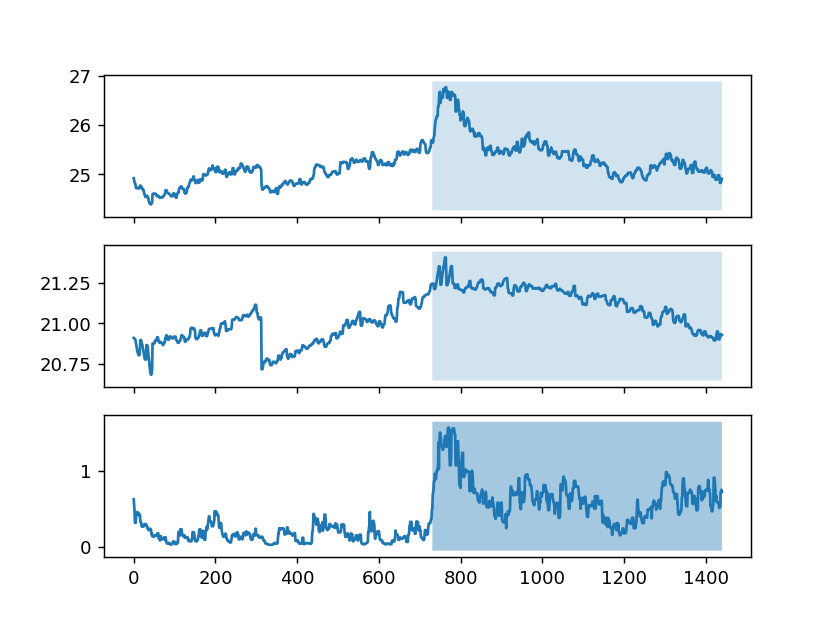

In [18]:

%matplotlib notebook

fig,ax = plt.subplots(3,1,sharex=True)

avg_min[['temp_avg','RT','distance']] = avg_min[['temp_avg','RT','distance']].rolling(5,center=True,min_periods=1).median()
ax[0].plot(avg_min.index,avg_min['temp_avg'])
ylim = ax[0].get_ylim()
ax[0].fill_between(avg_min.index,y1=ylim[0],y2=ylim[1], where=avg_min['isDay']<0.5,alpha=.2)

ax[1].plot(avg_min.index,avg_min['RT'])
ylim = ax[1].get_ylim()
ax[1].fill_between(avg_min.index,y1=ylim[0],y2=ylim[1], where=avg_min['isDay']<0.5,alpha=.2)

ax[2].plot(avg_min.index,avg_min['distance'])
ylim = ax[2].get_ylim()
ax[2].fill_between(avg_min.index,y1=ylim[0],y2=ylim[1], where=avg_min['isDay']<0.5,alpha=.4)


In [23]:


pth = Path(r'C:\Users\pupil\Downloads\thermal_behaviour_72_h')


def readTher(fnames):
    df = dd.read_csv((fnames/'data.csv').as_posix(), sep=';', skiprows=1, 
                     assume_missing=True)  
    df['distance'] = df.map_partitions(euclid) # da cambiare
    df = df.reset_index().rename(columns={'index':'index_old'})

    avg_min = df.groupby(['ID']).mean()
    avg_min = df.groupby(['minute']).mean()

    avg_min = avg_min.compute()
    avg_min = pd.concat([avg_min.loc[407:],avg_min.loc[:407]]).reset_index(drop=True)
    return avg_min

fnames = pth / '20230519_113859-ROI_*-WT_*'
wt = readTher(fnames)
fnames = pth / '20230519_113859-ROI_*-KO_*'
ko = readTher(fnames)


<IPython.core.display.Javascript object>


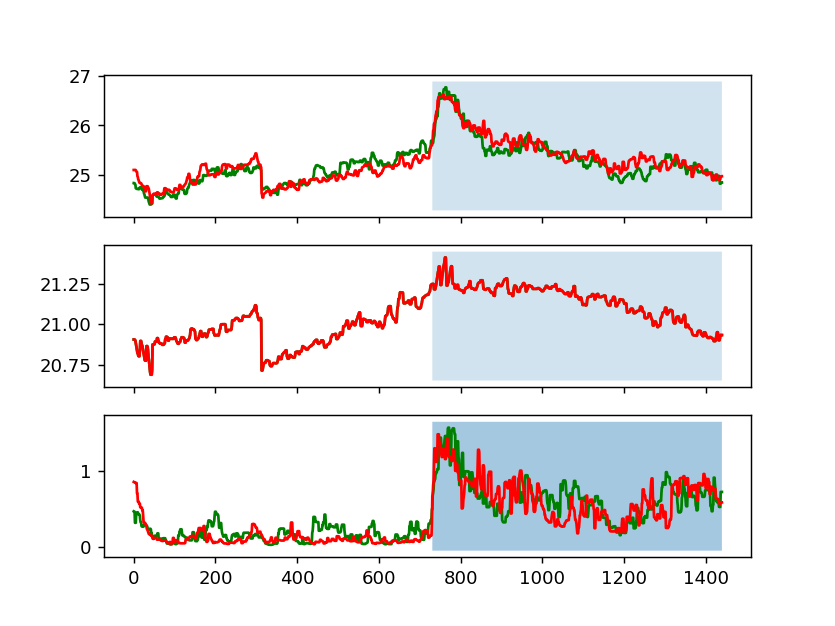

In [29]:
%matplotlib notebook

fig,ax = plt.subplots(3,1,sharex=True)

wt[['temp_avg','RT','distance']] = wt[['temp_avg','RT','distance']].rolling(5,center=True,min_periods=1).median()
ko[['temp_avg','RT','distance']] = ko[['temp_avg','RT','distance']].rolling(5,center=True,min_periods=1).median()

ax[0].plot(wt.index,wt['temp_avg'],'g')
ax[0].plot(ko.index,ko['temp_avg'],'r')
ylim = ax[0].get_ylim()
ax[0].fill_between(wt.index,y1=ylim[0],y2=ylim[1], where=wt['isDay']<0.5,alpha=.2)

ax[1].plot(wt.index,wt['RT'],'g')
ax[1].plot(ko.index,ko['RT'],'r')
ylim = ax[1].get_ylim()
ax[1].fill_between(wt.index,y1=ylim[0],y2=ylim[1], where=wt['isDay']<0.5,alpha=.2)

ax[2].plot(wt.index,wt['distance'],'g')
ax[2].plot(ko.index,ko['distance'],'r')
ylim = ax[2].get_ylim()
ax[2].fill_between(wt.index,y1=ylim[0],y2=ylim[1], where=wt['isDay']<0.5,alpha=.4)

